In [1]:
import pandas as pd

# load data
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.date = df.date.apply(pd.to_datetime)
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [2]:
def plot_state_curve(df, state: str):
    # get the state data
    state_df = df[df['state'] == state]
    # arrange by day
    day_df = state_df.drop(columns=['state', 'county']).groupby(by='date').agg(['sum'])
    day_df.plot(y=('cases', 'sum'))

def plot_state_counties_curve(df, state: str, counties: list):
    # get the state and county data
    state_df = df[df['state'] == state]
    counties_df = state_df[state_df.county.isin(counties)]
    # arrange by day
    day_df = counties_df.drop(columns=['state', 'county']).groupby(by='date').agg(['sum'])
    day_df.plot(y=('cases', 'sum'))
    
def plot_states_and_counties_curve(df, state_county_map: dict):
    """for metropolitan area. i.e. chicagoland"""
    states = state_county_map.keys()
    # trim dataset to relevant states, counties
    state_counties_df = df[df.apply(
        lambda x: x['state'] in states and x['county'] in state_county_map[x['state']]
    , axis=1)]
    # arrange by day
    day_df = state_counties_df.drop(columns=['state', 'county']).groupby(by='date').agg(['sum'])
    day_df.plot(y=('cases', 'sum'))

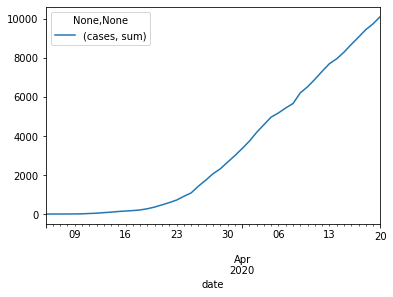

In [3]:
plot_state_curve(df, 'Colorado')

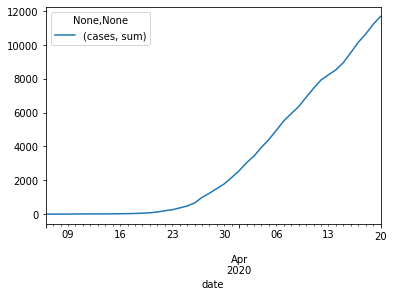

In [4]:
plot_state_curve(df, 'Indiana')

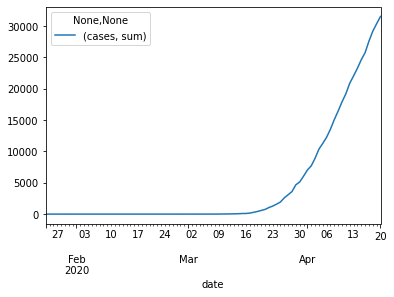

In [5]:
plot_state_curve(df, 'Illinois')

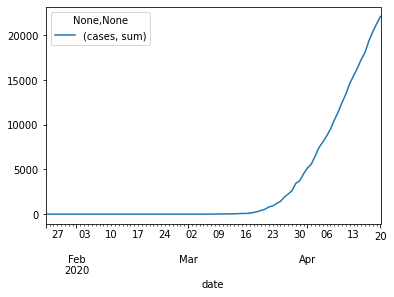

In [6]:
plot_state_counties_curve(df, 'Illinois', ['Cook'])

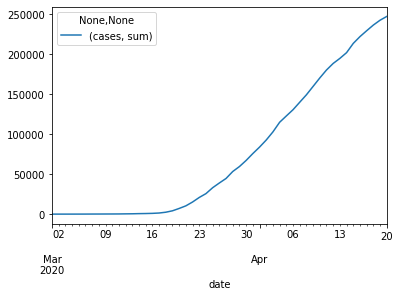

In [7]:
plot_state_curve(df, 'New York')

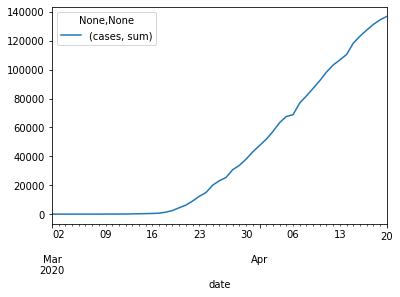

In [8]:
plot_state_counties_curve(df, 'New York', ['New York City'])

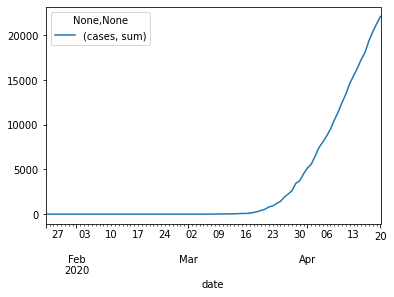

In [9]:
plot_state_counties_curve(df, 'Illinois', ['Cook'])

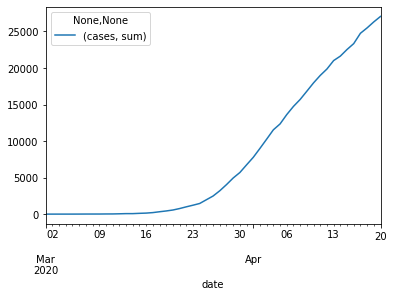

In [10]:
plot_state_curve(df, 'Florida')

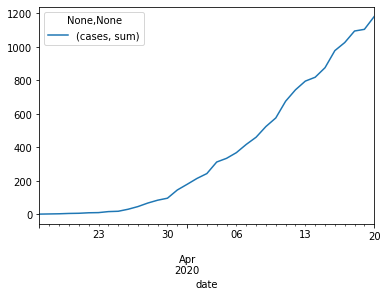

In [11]:
plot_state_counties_curve(df, 'Indiana', ['Lake'])

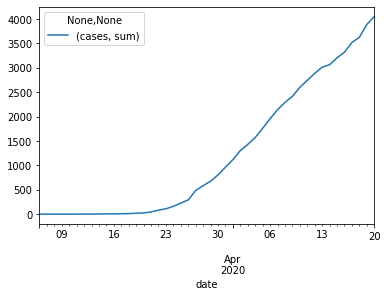

In [12]:
plot_state_counties_curve(df, 'Indiana', ['Marion'])

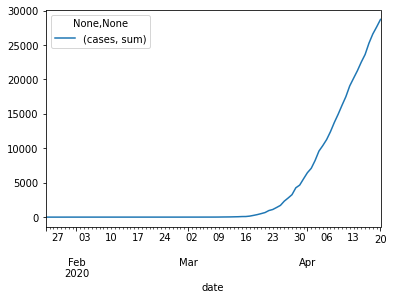

In [13]:
# https://en.wikipedia.org/wiki/Chicago_metropolitan_area
chicago_metropolitan = dict(
    Illinois=[
        'Cook',
        'DeKalb',
        'DuPage',
        'Grundy',
        'Kankakee',
        'Kane',
        'Kendall',
        'McHenry',
        'Will',
    ], 
    Indiana=[
        'Jasper',
        'Lake',
        'Newton',
        'Porter',
    ],
    Wisconsin=['Kenosha']
)

plot_states_and_counties_curve(df, chicago_metropolitan)